### Filtered grid 에서 기존 충전소 커버 지역 drop

In [2]:
import pandas as pd
import geopandas as gpd
import numpy
import geopandas
from pulp import *
from shapely.geometry import Point
import matplotlib.pyplot as plt
from tqdm import tqdm

In [3]:
df = gpd.read_file('/Users/jacob/Desktop/VS_Code_Repository/DeepLearning_Alpaco/빅콘테스트2022/Raw data/용인시_Grid_filtered(xyfeatures).geojson')
df_charge = pd.read_csv('/Users/jacob/Desktop/VS_Code_Repository/DeepLearning_Alpaco/빅콘테스트2022/Raw data/echarge_yongin_public_naver_xy.csv')

df_charge.drop_duplicates('주소',inplace=True)
df_charge.dropna(subset=['위도'],inplace=True)

# 충전소 반경 1km 커버지역으로 처리
df_charge =geopandas.GeoDataFrame(df_charge, geometry=geopandas.points_from_xy(df_charge.경도,df_charge.위도),crs='epsg:4326').to_crs('epsg:5178')
df_charge['buffered']=df_charge.buffer(distance=1000)

df_charge.head()

,운영기관,충전소,충전기ID,충전기타입,지역,시군구,주소,이용가능시간,이용자 제한,충전용량,비고,위도,경도,geometry,buffered
0,환경부(한국자동차환경협회),구성동주민센터,1,DC콤보,경기도,용인시,경기도 용인시 기흥구 구성로77번길 17,24시간 이용가능,NaN,급속(100kW단독),1시간무료,37.296806,127.119009,POINT (966422.856 1921745.685),"POLYGON ((967422.856 1921745.685, 967418.040 1..."
1,환경부(한국자동차환경협회),금학공영주차장,11,DC콤보,경기도,용인시,경기도 용인시 처인구 용문로 140,24시간 이용가능,NaN,급속(200kW동시),NaN,37.236118,127.201263,POINT (973691.909 1914986.937),"POLYGON ((974691.909 1914986.937, 974687.094 1..."
2,환경부(한국자동차환경협회),송전휴게소,1,DC차데모+AC3상+DC콤보,경기도,용인시,경기도 용인시 처인구 이동면 남북대로 2616(송전리 169-5),24시간 이용가능,NaN,급속(50kW),NaN,37.140322,127.204727,POINT (973966.223 1904358.490),"POLYGON ((974966.223 1904358.490, 974961.408 1..."
3,환경부(한국자동차환경협회),용인서부경찰서,1,DC콤보,경기도,용인시,경기도 용인시 기흥구 용구대로2469번길 32,24시간 이용가능,NaN,급속(100kW단독),NaN,37.309590,127.106228,POINT (965295.985 1923168.551),"POLYGON ((966295.985 1923168.551, 966291.170 1..."
4,환경부(한국자동차환경협회),용인시민체육공원,1,DC차데모+AC3상+DC콤보,경기도,용인시,경기도 용인시 처인구 동백죽전대로 61(28-6 용인미르스타디움),07:30~19:00,NaN,급속(100kW동시),NaN,37.249820,127.165180,POINT (970496.683 1916517.674),"POLYGON ((971496.683 1916517.674, 971491.867 1..."


In [4]:
buf =gpd.GeoDataFrame()
buf['entry']=True
buf=df_charge.set_geometry('buffered')
buf.drop(columns=['geometry'],inplace=True)
buf.geometry
buf.head()

,운영기관,충전소,충전기ID,충전기타입,지역,시군구,주소,이용가능시간,이용자 제한,충전용량,비고,위도,경도,buffered
0,환경부(한국자동차환경협회),구성동주민센터,1,DC콤보,경기도,용인시,경기도 용인시 기흥구 구성로77번길 17,24시간 이용가능,NaN,급속(100kW단독),1시간무료,37.296806,127.119009,"POLYGON ((967422.856 1921745.685, 967418.040 1..."
1,환경부(한국자동차환경협회),금학공영주차장,11,DC콤보,경기도,용인시,경기도 용인시 처인구 용문로 140,24시간 이용가능,NaN,급속(200kW동시),NaN,37.236118,127.201263,"POLYGON ((974691.909 1914986.937, 974687.094 1..."
2,환경부(한국자동차환경협회),송전휴게소,1,DC차데모+AC3상+DC콤보,경기도,용인시,경기도 용인시 처인구 이동면 남북대로 2616(송전리 169-5),24시간 이용가능,NaN,급속(50kW),NaN,37.140322,127.204727,"POLYGON ((974966.223 1904358.490, 974961.408 1..."
3,환경부(한국자동차환경협회),용인서부경찰서,1,DC콤보,경기도,용인시,경기도 용인시 기흥구 용구대로2469번길 32,24시간 이용가능,NaN,급속(100kW단독),NaN,37.309590,127.106228,"POLYGON ((966295.985 1923168.551, 966291.170 1..."
4,환경부(한국자동차환경협회),용인시민체육공원,1,DC차데모+AC3상+DC콤보,경기도,용인시,경기도 용인시 처인구 동백죽전대로 61(28-6 용인미르스타디움),07:30~19:00,NaN,급속(100kW동시),NaN,37.249820,127.165180,"POLYGON ((971496.683 1916517.674, 971491.867 1..."


In [5]:
buf.shape[0]

144

<AxesSubplot:>

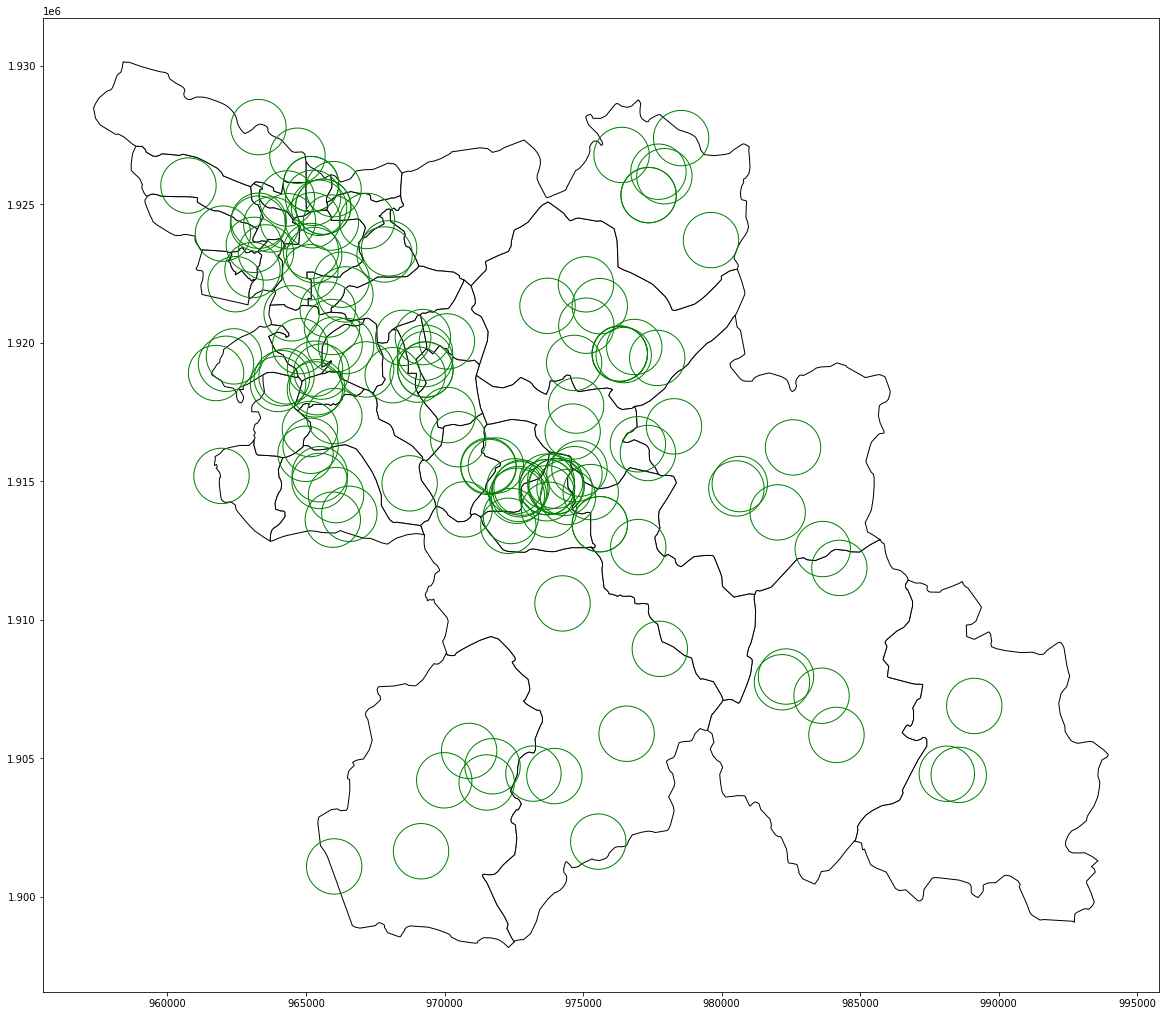

In [7]:
df_shp=gpd.read_file('/Users/jacob/Desktop/VS_Code_Repository/DeepLearning_Alpaco/빅콘테스트2022/Raw data/용인시_읍면동_EPSG4326.geojson')
df_shp.to_crs('epsg:5178',inplace=True)

base=df_shp.plot(figsize=(20,20),color='white',edgecolor='black')
buf.plot(ax=base,color='None',edgecolor='green')

In [8]:
tqdm.pandas()
# Drop 할 polygon 안에 들어가는 points 에 drop column 추가
result = gpd.sjoin(df,buf,how='left',op='within')
# Drop table 과 join 안된 points 만 남기기
result=result[result['주소'].isna()]
result=result.drop(columns=buf.drop(columns=['buffered']).columns.values)
result=result.drop(columns=['index_right'])
result.fillna(0,inplace=True)
result

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3338: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


,gid,lbl,val,longitude,latitude,geometry
0,다사750101,N/A,0.0,127.218888,37.189802,POINT (975240.056 1909843.864)
1,다사914045,N/A,0.0,127.403730,37.139617,POINT (991640.264 1904244.063)
2,다사918030,N/A,0.0,127.408251,37.126099,POINT (992040.289 1902744.057)
3,다사595284,N/A,0.0,127.043257,37.354210,POINT (959739.665 1928143.776)
4,다사720059,N/A,0.0,127.185244,37.151858,POINT (972240.096 1905643.788)
...,...,...,...,...,...,...
25660,다사750282,0,0.0,127.218280,37.352953,POINT (975239.789 1927944.005)
25661,다사631163,0,0.0,127.084506,37.245294,POINT (963339.873 1916043.736)
25662,다사581288,0,0.0,127.027427,37.357753,POINT (958339.648 1928543.759)
25663,다사588268,0,0.0,127.035442,37.339757,POINT (959039.684 1926543.753)


In [9]:
result.to_file('/Users/jacob/Desktop/VS_Code_Repository/DeepLearning_Alpaco/빅콘테스트2022/Raw data/용인시_Grid_filtered_v2(dropped_covered).geojson',index=False, encoding='utf-8')